In [1]:
import pandas as pd
pd.options.display.max_rows = 4000
import numpy as np

import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
from matplotlib import pyplot as plt
import seaborn as sns

from apyori import apriori
import pyfpgrowth

In [2]:
data = pd.read_csv("housing_dataset.csv")

In [3]:
data.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

# Descriptive Analytics and Preprocessing

In [4]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
ID                                           21613 non-null int64
Date House was Sold                          21613 non-null object
Sale Price                                   21609 non-null float64
No of Bedrooms                               21613 non-null int64
No of Bathrooms                              21609 non-null float64
Flat Area (in Sqft)                          21604 non-null float64
Lot Area (in Sqft)                           21604 non-null float64
No of Floors                                 21613 non-null float64
Waterfront View                              21613 non-null object
No of Times Visited                          21613 non-null object
Condition of the House                       21613 non-null object
Overall Grade                                21613 non-null int64
Area of the House from Basement (in Sqft)    21610 non-null float64
Basement Area (in

In [6]:
data.drop(columns=['ID']).corr()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
Sale Price,1.000000,0.308463,0.525124,0.702081,0.089616,0.256941,0.580654,0.605495,0.323813,-0.054034,0.126436,-0.053198,0.306889,0.021507,0.585393,0.082445
No of Bedrooms,0.308463,1.000000,0.515883,0.576616,0.031620,0.175429,0.349008,0.477592,0.303093,-0.154178,0.018841,-0.152656,-0.008879,0.129499,0.391649,0.029244
No of Bathrooms,0.525124,0.515883,1.000000,0.754691,0.087758,0.500601,0.635573,0.685249,0.283774,-0.505957,0.050752,-0.204044,0.024508,0.223165,0.568606,0.087218
Flat Area (in Sqft),0.702081,0.576616,0.754691,1.000000,0.172809,0.353950,0.705835,0.876587,0.435230,-0.318207,0.055365,-0.199416,0.052543,0.240152,0.756357,0.183223
Lot Area (in Sqft),0.089616,0.031620,0.087758,0.172809,1.000000,-0.005235,0.102345,0.183512,0.015287,-0.053062,0.007717,-0.129536,-0.085672,0.229494,0.144548,0.718548
No of Floors,0.256941,0.175429,0.500601,0.353950,-0.005235,1.000000,0.461228,0.523840,-0.245705,-0.489319,0.006338,-0.059122,0.049648,0.125391,0.279874,-0.011269
Overall Grade,0.580654,0.349008,0.635573,0.705835,0.102345,0.461228,1.000000,0.705183,0.145266,-0.456629,0.010440,-0.185836,0.111301,0.201745,0.681338,0.107581
Area of the House from Basement (in Sqft),0.605495,0.477592,0.685249,0.876587,0.183512,0.523840,0.705183,1.000000,-0.051821,-0.423822,0.023301,-0.261130,-0.000866,0.343776,0.731998,0.194100
Basement Area (in Sqft),0.323813,0.303093,0.283774,0.435230,0.015287,-0.245705,0.145266,-0.051821,1.000000,0.133124,0.071323,0.074854,0.110554,-0.144728,0.200371,0.017276
Age of House (in Years),-0.054034,-0.154178,-0.505957,-0.318207,-0.053062,-0.489319,-0.456629,-0.423822,0.133124,1.000000,0.224874,0.346829,0.148066,-0.409336,-0.326217,-0.070958


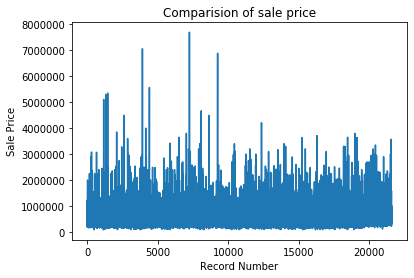

In [7]:
plt.plot(data['Sale Price'])
plt.xlabel("Record Number")
plt.ylabel("Sale Price")
plt.title("Comparision of sale price")
plt.show()

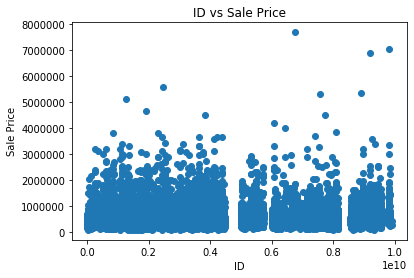

In [8]:
plt.scatter(x=data['ID'], y=data['Sale Price'])
plt.title("ID vs Sale Price")
plt.xlabel('ID')
plt.ylabel('Sale Price')
plt.show()

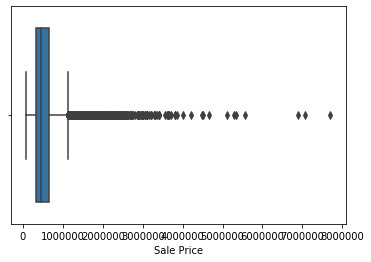

In [9]:
sns.boxplot(x=data['Sale Price'])
plt.show()

Cleaning outliers

In [10]:
q1 = data['Sale Price'].quantile(0.25)
q3 = data['Sale Price'].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

def limit_imputer(value):
    if(value>upper_limit):
        return upper_limit
    if(value<lower_limit):
        return lower_limit
    else:
        return value

In [11]:
data['Sale Price'] = data['Sale Price'].apply(limit_imputer)

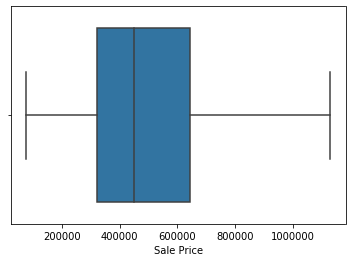

In [12]:
sns.boxplot(x=data['Sale Price'])
plt.show()

Visualizing mean sale price based on condition of the house

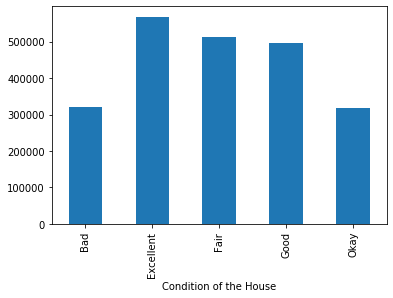

In [13]:
data.groupby('Condition of the House',)['Sale Price'].mean().plot(kind='bar')

Visualizing the distribution of sale price

C:\Users\rammo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\rammo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


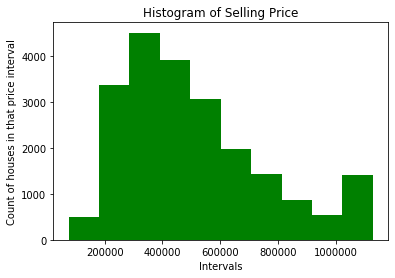

In [14]:
plt.hist(data['Sale Price'], bins=10, color='green')
plt.xlabel('Intervals')
plt.ylabel('Count of houses in that price interval')
plt.title("Histogram of Selling Price")
plt.show()

Encourted some invalid values

In [15]:
data['Sale Price'].unique()

array([ 221900.,  538000.,  180000.,  604000.,  510000., 1129575.,
        257500.,  291850.,  229500.,  323000.,  662500.,  468000.,
        310000.,  400000.,  530000.,  650000.,  395000.,  485000.,
        189000.,  230000.,  385000.,  285000.,  252700.,  329000.,
        233000.,  937000.,  667000.,  438000.,  719000.,  580500.,
        280000.,  687500.,  535000.,  322500.,  696000.,  550000.,
        640000.,  240000.,  605000.,  625000.,  775000.,  861990.,
        685000.,  309000.,  488000.,  210490.,  785000.,  450000.,
        228000.,  345000.,  600000.,  585000.,  920000.,  885000.,
        292500.,  301000.,  951000.,  430000.,  289000.,  505000.,
        549000.,  425000.,  317625.,  975000.,  287000.,  204000.,
       1040000.,  325000.,  571000.,  360000.,  349000.,  832500.,
        380000.,  480000.,  410000.,  720000.,  390000.,  355000.,
        356000.,  315000.,  940000.,  305000.,  461000.,  215000.,
        335000.,      nan, 1100000.,  153000.,  700000.,  9050

Has some Nan values

In [16]:
# Dropping Nan Values
data.dropna(inplace=True, axis=0, subset=['Sale Price'])

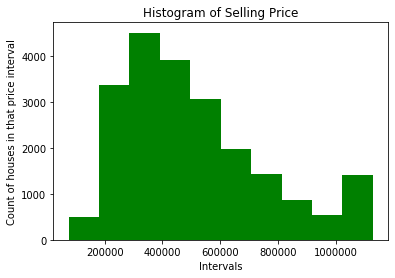

In [17]:
plt.hist(data['Sale Price'], bins=10, color='green')
plt.xlabel('Intervals')
plt.ylabel('Count of houses in that price interval')
plt.title("Histogram of Selling Price")
plt.show()

Data Transformation - Modifying the categorical variable of No of Times Visited to numerical with values 0, 1, 2, 3

In [18]:
data['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [19]:
mapping = {'None': '0',
          'Once': '1',
          'Twice': '2',
          'Thrice': '3',
          'Four': '4'}
data['No of Times Visited'] = data['No of Times Visited'].map(mapping)

In [20]:
data['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

Data reduction - Modifying the year of renovation to year since renovation. Since the most recent one get high sale price

In [21]:
# Modifying the year renovated numerical variable to ever renovated categorical variable

data['Ever Renovated'] = np.where(data['Renovated Year']==0, 'No', 'Yes')
data['Ever Renovated'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
data['Purchase Year'] = pd.DatetimeIndex(data['Date House was Sold']).year

data['Year Since Renovation'] = np.where(data['Ever Renovated']=='Yes', 
                                           abs(data['Purchase Year'] - 
                                               data['Renovated Year']), 0)

data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Purchase Year,Year Since Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,No,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,0,...,9,0,98103.0,47.6993,-122.346,1530.0,1509,No,2017,0
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,0,...,4,0,98146.0,47.5107,-122.362,1830.0,7200,No,2016,0
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,0,...,9,0,98144.0,47.5944,-122.299,1020.0,2007,No,2017,0
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,0,...,14,0,98027.0,47.5345,-122.069,1410.0,1287,No,2016,0


In [23]:
# Dropping the unwanted columns like Renovated Year, Date house was sold

data.drop(columns = ['Date House was Sold', 'Renovated Year'], inplace=True)
data

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Purchase Year,Year Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,No,0,Fair,...,0,9,98103.0,47.6993,-122.346,1530.0,1509,No,2017,0
21609,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,No,0,Fair,...,0,4,98146.0,47.5107,-122.362,1830.0,7200,No,2016,0
21610,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,No,0,Fair,...,0,9,98144.0,47.5944,-122.299,1020.0,2007,No,2017,0
21611,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,No,0,Fair,...,0,14,98027.0,47.5345,-122.069,1410.0,1287,No,2016,0


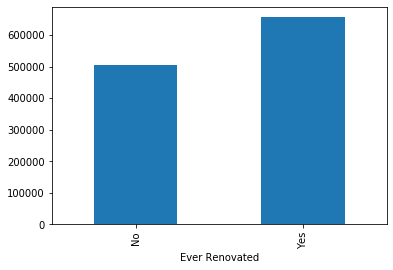

In [24]:
# Visualizing mean sale price based on renovation

data.groupby('Ever Renovated',)['Sale Price'].mean().sort_values().plot(kind='bar')
plt.show()

Data Trasformation

Creating dummy variables

In [25]:
# Getting dummies this is similar to one hot encoding

data_dummies = pd.get_dummies(data,
                       columns = ['Ever Renovated', 'Waterfront View', 'Condition of the House'],
                       drop_first=True)
data_dummies

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Purchase Year,Year Since Renovation,Ever Renovated_Yes,Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,1340.0,5650,2017,0,0,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,1690.0,7639,2017,26,1,0,0,1,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,2720.0,8062,2016,0,0,0,0,1,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,1360.0,5000,2017,0,0,0,1,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,1800.0,7503,2016,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,...,1530.0,1509,2017,0,0,0,0,1,0,0
21609,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,...,1830.0,7200,2016,0,0,0,0,1,0,0
21610,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,...,1020.0,2007,2017,0,0,0,0,1,0,0
21611,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,...,1410.0,1287,2016,0,0,0,0,1,0,0


Binning

In [26]:
# Binning

data_binning = data.groupby('Zipcode').agg({'Sale Price': 'mean'}).sort_values('Sale Price',ascending=True)

data_binning.head()

,Sale Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [27]:
data_binning['Zipcode_Group'] = pd.cut(data_binning['Sale Price'],
                                   bins = 10,
                                   labels = ['Zipcode_Group0',
                                            'Zipcode_Group1',
                                            'Zipcode_Group2',
                                            'Zipcode_Group3',
                                            'Zipcode_Group4',
                                            'Zipcode_Group5',
                                            'Zipcode_Group6',
                                            'Zipcode_Group7',
                                            'Zipcode_Group8',
                                            'Zipcode_Group9',],
                                   include_lowest=True)

data_binning.head()

,Sale Price,Zipcode_Group
Zipcode,,
98002.0,234284.035176,Zipcode_Group0
98168.0,240328.371747,Zipcode_Group0
98032.0,251296.240000,Zipcode_Group0
98001.0,280804.690608,Zipcode_Group0
98148.0,284908.596491,Zipcode_Group0


In [28]:
# Removing Sale Price in data_binning to combine it to origianl data set
data_binning = data_binning.drop(columns = 'Sale Price')

# merging Zip_table into original data
data_dummies = pd.merge(data_dummies,
                 data_binning,
                 left_on = 'Zipcode',
                 how='left',
                 right_index=True)

# Removing zipcode column to create dummy variables as above one
data_dummies = data_dummies.drop(columns='Zipcode')

# Creating dummy variables for zipcode
data_dummies = pd.get_dummies(data_dummies, columns = ['Zipcode_Group'],drop_first=True)
data_dummies

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Condition of the House_Okay,Zipcode_Group_Zipcode_Group1,Zipcode_Group_Zipcode_Group2,Zipcode_Group_Zipcode_Group3,Zipcode_Group_Zipcode_Group4,Zipcode_Group_Zipcode_Group5,Zipcode_Group_Zipcode_Group6,Zipcode_Group_Zipcode_Group7,Zipcode_Group_Zipcode_Group8,Zipcode_Group_Zipcode_Group9
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,0,0,1,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,...,0,0,0,1,0,0,0,0,0,0
21609,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,...,0,1,0,0,0,0,0,0,0,0
21610,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,...,0,0,0,1,0,0,0,0,0,0
21611,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,...,0,0,0,0,1,0,0,0,0,0


In [29]:
data.drop(columns='ID', inplace=True)

# DTC

In [30]:
data.columns

Index(['Sale Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'Waterfront View', 'No of Times Visited', 'Condition of the House',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Zipcode',
       'Latitude', 'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'Ever Renovated',
       'Purchase Year', 'Year Since Renovation'],
      dtype='object')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
Sale Price                                   21609 non-null float64
No of Bedrooms                               21609 non-null int64
No of Bathrooms                              21605 non-null float64
Flat Area (in Sqft)                          21600 non-null float64
Lot Area (in Sqft)                           21600 non-null float64
No of Floors                                 21609 non-null float64
Waterfront View                              21609 non-null object
No of Times Visited                          21609 non-null object
Condition of the House                       21609 non-null object
Overall Grade                                21609 non-null int64
Area of the House from Basement (in Sqft)    21606 non-null float64
Basement Area (in Sqft)                      21609 non-null int64
Age of House (in Years)                      21609 non-null int64
Zipcode           

In [32]:
data.drop(columns = ['Ever Renovated', 'No of Times Visited'], inplace=True)

In [33]:
# data['Waterfront View'].unique()

mapping1 = {'Bad': '0',
          'Fair': '1',
          'Okay': '2',
          'Good': '3',
          'Excellent': '4'}
data['Condition of the House'] = data['Condition of the House'].map(mapping1)

mapping2 = {'No': '0',
          'Yes': '1',}
data['Waterfront View'] = data['Waterfront View'].map(mapping2)

In [34]:
data['Waterfront View'] = data['Waterfront View'].astype('int64')
data['Condition of the House'] = data['Condition of the House'].astype('int64')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 19 columns):
Sale Price                                   21609 non-null float64
No of Bedrooms                               21609 non-null int64
No of Bathrooms                              21605 non-null float64
Flat Area (in Sqft)                          21600 non-null float64
Lot Area (in Sqft)                           21600 non-null float64
No of Floors                                 21609 non-null float64
Waterfront View                              21609 non-null int64
Condition of the House                       21609 non-null int64
Overall Grade                                21609 non-null int64
Area of the House from Basement (in Sqft)    21606 non-null float64
Basement Area (in Sqft)                      21609 non-null int64
Age of House (in Years)                      21609 non-null int64
Zipcode                                      21608 non-null float64
Latitude           

In [36]:
data

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Purchase Year,Year Since Renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,1,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,2017,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,1,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,2017,26
2,180000.0,2,1.00,770.0,10000.0,1.0,0,1,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,2016,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,4,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,2017,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,1,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530.0,1131.0,3.0,0,1,8,1530.0,0,9,98103.0,47.6993,-122.346,1530.0,1509,2017,0
21609,400000.0,4,2.50,2310.0,5813.0,2.0,0,1,8,2310.0,0,4,98146.0,47.5107,-122.362,1830.0,7200,2016,0
21610,402101.0,2,0.75,1020.0,1350.0,2.0,0,1,7,1020.0,0,9,98144.0,47.5944,-122.299,1020.0,2007,2017,0
21611,400000.0,3,2.50,1600.0,2388.0,2.0,0,1,8,1600.0,0,14,98027.0,47.5345,-122.069,1410.0,1287,2016,0


In [37]:
mean = data['Sale Price'].mean()

data1 = data

def modify_price(value):
    if(value>=mean):
        return 1
    else:
        return 0
    
data1['Sale Price'] = data1['Sale Price'].apply(modify_price)

In [38]:
data1

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Purchase Year,Year Since Renovation
0,0,3,1.00,1180.0,5650.0,1.0,0,1,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,2017,0
1,1,3,2.25,2570.0,7242.0,2.0,0,1,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,2017,26
2,0,2,1.00,770.0,10000.0,1.0,0,1,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,2016,0
3,1,4,3.00,1960.0,5000.0,1.0,0,4,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,2017,0
4,0,3,2.00,1680.0,8080.0,1.0,0,1,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0,3,2.50,1530.0,1131.0,3.0,0,1,8,1530.0,0,9,98103.0,47.6993,-122.346,1530.0,1509,2017,0
21609,0,4,2.50,2310.0,5813.0,2.0,0,1,8,2310.0,0,4,98146.0,47.5107,-122.362,1830.0,7200,2016,0
21610,0,2,0.75,1020.0,1350.0,2.0,0,1,7,1020.0,0,9,98144.0,47.5944,-122.299,1020.0,2007,2017,0
21611,0,3,2.50,1600.0,2388.0,2.0,0,1,8,1600.0,0,14,98027.0,47.5345,-122.069,1410.0,1287,2016,0


In [39]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 19 columns):
Sale Price                                   21609 non-null int64
No of Bedrooms                               21609 non-null int64
No of Bathrooms                              21605 non-null float64
Flat Area (in Sqft)                          21600 non-null float64
Lot Area (in Sqft)                           21600 non-null float64
No of Floors                                 21609 non-null float64
Waterfront View                              21609 non-null int64
Condition of the House                       21609 non-null int64
Overall Grade                                21609 non-null int64
Area of the House from Basement (in Sqft)    21606 non-null float64
Basement Area (in Sqft)                      21609 non-null int64
Age of House (in Years)                      21609 non-null int64
Zipcode                                      21608 non-null float64
Latitude             

In [40]:
data1.drop(columns = ['Zipcode', 'Latitude', 'Longitude'], inplace=True)

In [41]:
data1.describe()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Purchase Year,Year Since Renovation
count,21609.000000,21609.000000,21605.000000,21600.000000,2.160000e+04,21609.000000,21609.000000,21609.000000,21609.000000,21606.000000,21609.000000,21609.000000,21608.000000,21609.000000,21609.000000,21609.000000
mean,0.407978,3.370771,2.114684,2079.943333,1.510953e+04,1.494215,0.007543,1.768245,7.623490,1788.351291,291.513490,46.999722,1986.560024,12769.770790,2016.677079,0.884122
std,0.491470,0.929916,0.770166,918.532579,4.143187e+04,0.539909,0.086525,1.085680,1.105519,828.030715,442.570991,29.373317,685.442621,27306.508841,0.467604,5.279629
min,0.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,290.000000,0.000000,3.000000,399.000000,651.000000,2016.000000,0.000000
25%,0.000000,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,0.000000,1.000000,7.000000,1190.000000,0.000000,21.000000,1490.000000,5100.000000,2016.000000,0.000000
50%,0.000000,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,1.000000,7.000000,1560.000000,0.000000,43.000000,1840.000000,7620.000000,2017.000000,0.000000
75%,1.000000,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,3.000000,8.000000,2210.000000,560.000000,67.000000,2360.000000,10084.000000,2017.000000,0.000000
max,1.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,10.000000,9410.000000,4820.000000,118.000000,6210.000000,871200.000000,2017.000000,83.000000


In [42]:
# data1.drop(columns='Lot Area (in Sqft)', inplace=True)

In [43]:
data1 = data1.dropna()

In [44]:
data1.isnull().sum()

Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
Purchase Year                                0
Year Since Renovation                        0
dtype: int64

In [45]:
X = data1.drop(columns = ['Sale Price'])
Y = data1['Sale Price']

In [46]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [47]:
#splitting the dataset
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_X, Y, train_size = 0.80, stratify = Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17266, 15), (4317, 15), (17266,), (4317,))

In [48]:
y_train

12590    1
19529    1
14305    1
570      0
550      1
        ..
19075    0
14230    1
7509     0
11872    0
5121     0
Name: Sale Price, Length: 17266, dtype: int64

In [49]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC( class_weight = 'balanced')
classifier = DTC()

In [50]:
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_train)

In [51]:
predicted_values[:30]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_train, predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10223
           1       1.00      1.00      1.00      7043

    accuracy                           1.00     17266
   macro avg       1.00      1.00      1.00     17266
weighted avg       1.00      1.00      1.00     17266



In [53]:
predicted_values = classifier.predict(x_test)
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2556
           1       0.72      0.74      0.73      1761

    accuracy                           0.78      4317
   macro avg       0.77      0.77      0.77      4317
weighted avg       0.78      0.78      0.78      4317



In [54]:
# pip install graphviz

In [55]:
from sklearn.tree import export_graphviz
export_graphviz(decision_tree = classifier, out_file = 'tree_viz',
                max_depth=None, feature_names = X.columns ,
                label = None, impurity = False)

In [56]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'

In [62]:
conda install -c anaconda python-graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\rammo\Anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be SUPERSEDED by a higher-priority channel:

  python-graphviz    pkgs/main::python-graphviz-0.16-pyhd3~ --> anaconda::python-graphviz-0.14.2-py_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [63]:
from graphviz import render
render(filepath='tree_viz', format = 'png', engine = 'neato')

ImportError: cannot import name 'ENGINES' from 'graphviz.backend' (C:\Users\rammo\Anaconda3\lib\site-packages\graphviz\backend\__init__.py)